In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Guided Project: Star Wars Survey

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")

In [3]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Let's start by removing any rows where the `RespondentID` is NaN.

In [5]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

So, how many people in our dataset have actually seen at least 1 of the Star Wars films.

In [6]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

A suprising 250 people haven't seen **any** Star Wars film, that's pretty incredible. 

In [7]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

The `value_counts` method just doesn't count null vales, so that explains the difference in total responses between the two questions.

Instead of dealing with 'Yes'/'No' strings we want to change the answer to these questions to boolean responses. So, first we will create a mapping dictionary.

In [8]:
yes_no = {"Yes": True,
         "No": False}

In [9]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

In [10]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [11]:
star_wars[star_wars.columns[8]].unique()

array(['Star Wars: Episode VI Return of the Jedi', nan], dtype=object)

In [12]:
star_warsSeen = {"Star Wars: Episode I  The Phantom Menace", 
 "Star Wars: Episode II  Attack of the Clones",
 "Star Wars: Episode III  Revenge of the Sith",
 "Star Wars: Episode IV  A New Hope",
 "Star Wars: Episode V The Empire Strikes Back",
 "Star Wars: Episode VI Return of the Jedi"}

In [13]:
star_wars.iloc[:, 3:9] = star_wars.iloc[:, 3:9].isin(star_warsSeen) 

In [14]:
columns={"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
         "Unnamed: 4": "seen_2",
         "Unnamed: 5": "seen_3",
         "Unnamed: 6": "seen_4",
         "Unnamed: 7": "seen_5",
         "Unnamed: 8": "seen_6"}

star_wars = star_wars.rename(columns={"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
         "Unnamed: 4": "seen_2",
         "Unnamed: 5": "seen_3",
         "Unnamed: 6": "seen_4",
         "Unnamed: 7": "seen_5",
         "Unnamed: 8": "seen_6"})

In [15]:
star_wars.iloc[:, 3:9]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


In [16]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [17]:
star_wars = star_wars.rename(columns={"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
         "Unnamed: 10": "ranking_2",
         "Unnamed: 11": "ranking_3",
         "Unnamed: 12": "ranking_4",
         "Unnamed: 13": "ranking_5",
         "Unnamed: 14": "ranking_6"})

In [18]:
N = star_wars[star_wars.columns[9:15]].mean()
N

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

Let's take a look at the average ranking for each film, this doesn't seem like the best way to represent the data, as a lower ranking is better in this case.

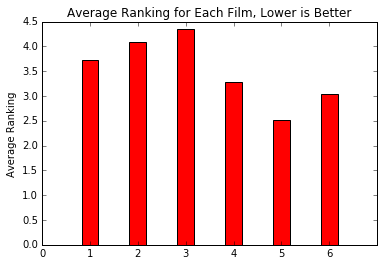

In [20]:
ind = np.arange(len(N))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, N, width, color='r', align='center')
ax.set_xticklabels(('0', '1', '2', '3', '4', '5', '6'))
ax.set_ylabel('Average Ranking')
ax.set_title('Average Ranking for Each Film, Lower is Better');

In [31]:
N = star_wars.iloc[:, 3:9].sum()

Which film in the franchise has been views the most? The original films (4,5,6) have more viewings, with Empire Strikes Back having the most. The views align with the ranking data which may suggest that lower rankings are skewed based on views. It would also make sense that the more highly ranked a film the more people would want to see it. 

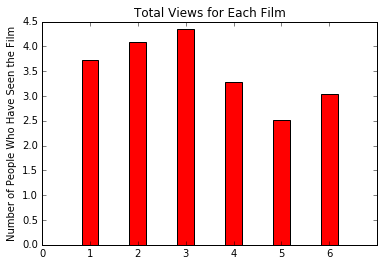

In [21]:
ind = np.arange(len(N))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, N, width, color='r', align='center')
ax.set_xticklabels(('0', '1', '2', '3', '4', '5', '6'))
ax.set_ylabel('Number of People Who Have Seen the Film')
ax.set_title('Total Views for Each Film');

In [23]:
fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

Non-fans tend to be kinder to the newer films, even ranking Episodes 1 and 2 above New Hope!

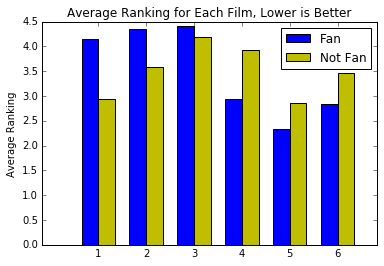

In [24]:
fan_mean = fan[fan.columns[9:15]].mean()
not_fan_mean = not_fan[not_fan.columns[9:15]].mean()

ind = np.arange(len(fan_mean))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, fan_mean, width, color='b', align = 'center')

rects2 = ax.bar(ind + width, not_fan_mean, width, color='y', align = 'center')

# add some text for labels, title and axes ticks
ax.set_ylabel('Average Ranking')
ax.set_title('Average Ranking for Each Film, Lower is Better')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6'))
ax.legend((rects1[0], rects2[0]), ('Fan', 'Not Fan'));

In [26]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

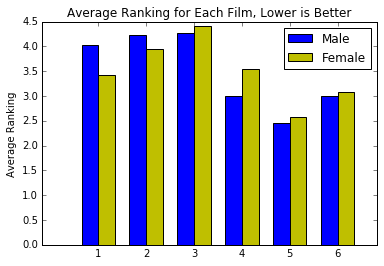

In [27]:
males_mean = males[males.columns[9:15]].mean()
females_mean = females[females.columns[9:15]].mean()

ind = np.arange(len(males_mean))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, males_mean, width, color='b', align = 'center')

rects2 = ax.bar(ind + width, females_mean, width, color='y', align = 'center')

# add some text for labels, title and axes ticks
ax.set_ylabel('Average Ranking')
ax.set_title('Average Ranking for Each Film, Lower is Better')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6'))
ax.legend((rects1[0], rects2[0]), ('Male', 'Female'));

Men tend to be harser to the film overall, but the difference in ranking of the films does not differ the way it does when the data is split between fan and non-fan. 

Here are some potential next steps:

+ Try to segment the data based on columns like Education, Location (Census Region), and Which character shot first?, which aren't binary. Are they any interesting patterns?

+ Clean up columns 15 to 29, which contain data on the characters respondents view favorably and unfavorably.
    + Which character do respondents like the most?
    + Which character do respondents dislike the most?
    + Which character is the most controversial (split between likes and dislikes)?